{'python': 32, 'javascript': 16, 'typescript': 30, 'ruby': 9, 'java': 10, 'rust': 13, 'c#': 2}


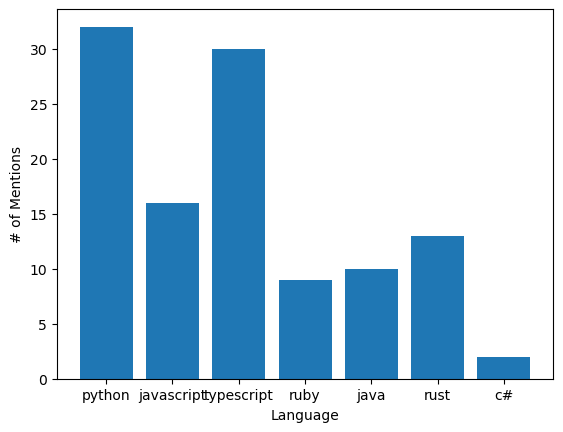

In [6]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

def main():
    url = "https://news.ycombinator.com/item?id=29782099"
    response = requests.get(url)
    df=pd.read_html(url,header=0)
    df
    soup = BeautifulSoup(response.content, "html.parser")
    elements = soup.find_all(class_="ind", indent=0)
    comments = [e.find_next(class_="comment") for e in elements]

    keywords = {
        "python": 0,
        "javascript": 0,
        "typescript": 0,
        "ruby": 0,
        "java": 0,
        "rust": 0,
        "c#": 0,
    }

    for comment in comments:
        comment_text = comment.get_text().lower()
        words = comment_text.split(" ")
        words = {w.strip(".,/:;!@") for w in words}

        for k in keywords:
            if k in words:
                keywords[k] += 1

    print(keywords)

    plt.bar(keywords.keys(), keywords.values())
    plt.xlabel("Language")
    plt.ylabel("# of Mentions")
    plt.show()


if __name__ == "__main__":
    main()